# Balloon Map Plotter

This simple notebook shows how we can read ballon experiment header data from the HDF5 and make some plots on maps


In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import h5py
import anitageom
import scipy



In [2]:
run=42
f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
rungr=f['run'+str(run)]


In [3]:
print(rungr.keys())

<KeysViewHDF5 ['altitude', 'attFlag', 'brms', 'distToWais', 'eventNumber', 'goodTimeFlag', 'heading', 'l3TrigPattern', 'l3TrigPatternH', 'latitude', 'longitude', 'mrms', 'phiTrigMask', 'phiTrigMaskH', 'pitch', 'priority', 'roll', 'triggerTime', 'triggerTimeNs']>


Text(0, 0.5, 'Altitude (m)')

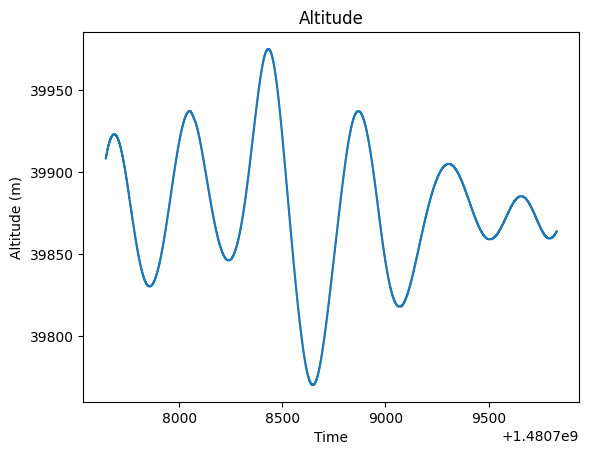

In [4]:
fig,ax = plt.subplots()
ax.set_title("Altitude")
#print(rungr['triggerTime'][:])
ax.plot(rungr['triggerTime'][:],rungr['altitude'][:])
ax.set_xlabel("Time")
ax.set_ylabel("Altitude (m)")

distToWais [12626282.46804209 12626282.65461327 12626282.80864398 ...
 12629675.93846886 12629675.9741964  12629675.9741964 ]


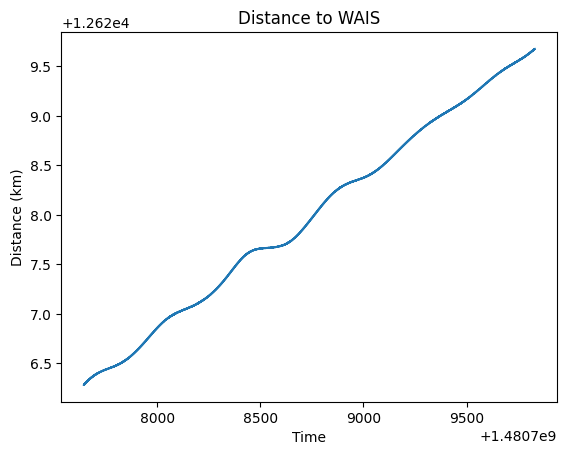

In [5]:
fig,ax = plt.subplots()
ax.set_title("Distance to WAIS")
ax.plot(rungr['triggerTime'][:],rungr['distToWais'][:]/1e3)
ax.set_xlabel("Time")
ax.set_ylabel("Distance (km)")

print('distToWais',rungr['distToWais'][:])


Text(0, 0.5, 'Distance (km)')

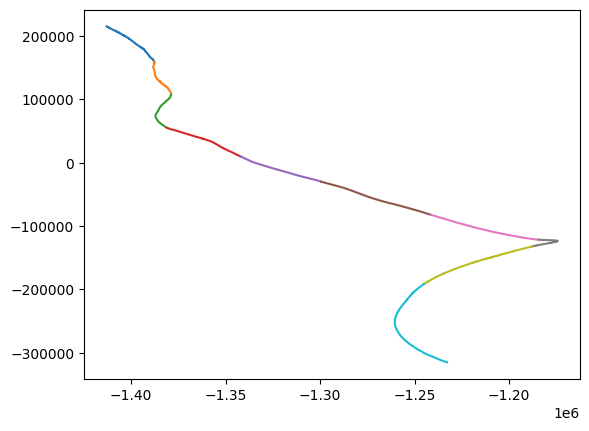

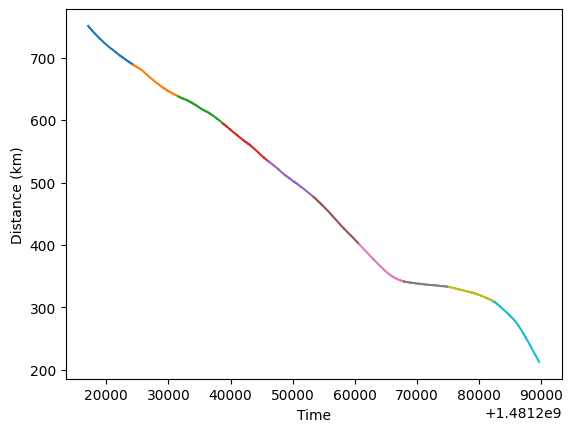

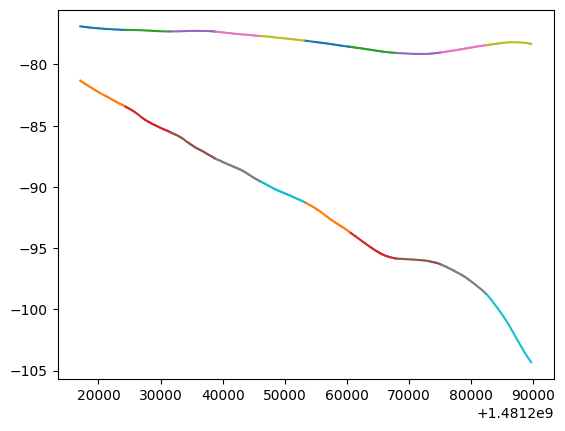

In [6]:

myGeom=anitageom.AnitaGeom()

fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
for run in range(120,130):
    f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
    rungr=f['run'+str(run)]

    if 'latitude' in rungr.keys():
        lat=np.array(rungr['latitude'][:])
        lon=np.array(rungr['longitude'][:])
        ax2.plot(rungr['triggerTime'][:],rungr['distToWais'][:]/1e3)
        ax3.plot(rungr['triggerTime'][:],lat)
        ax3.plot(rungr['triggerTime'][:],lon)
        
    
        antX,antY=myGeom.latlonToAntarctica(lat,lon)
        ax.plot(antX,antY,label="Run "+str(run))
#ax.legend()
ax2.set_xlabel("Time")
ax2.set_ylabel("Distance (km)")

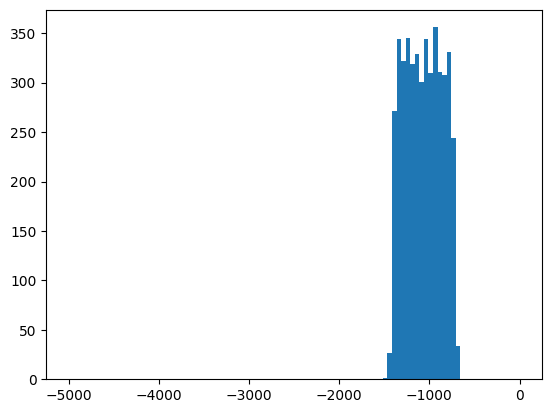

In [21]:
from scipy import constants
run=130
f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
rungr=f['run'+str(run)]
fig,ax = plt.subplots()

bins = np.linspace(-5000,0,100)

ax.hist(rungr['triggerTimeNs'][:]-1e9*rungr['distToWais'][:]/constants.c,bins=bins)

isWAIS=np.abs(rungr['triggerTimeNs'][:]-1e9*rungr['distToWais'][:]/constants.c)<5000



In [24]:
print(rungr['eventNumber'][:][isWAIS])

[22896178 22896210 22896229 ... 23161500 23161526 23161628]
